In [1]:
import langchain
langchain.__version__

'1.2.0'

In [57]:
import os
from dotenv import load_dotenv
load_dotenv()
# load_dotenv(override=True) Updating an existing key


os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

## Crate & Invoke a GPT model

### 1. init_chat_model

In [4]:
from langchain.chat_models import init_chat_model

groq_model1 = init_chat_model("groq:qwen/qwen3-32b")
print(groq_model1)

profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True} client=<groq.resources.chat.completions.Completions object at 0x0000019761967C50> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000019761E10690> model_name='qwen/qwen3-32b' model_kwargs={} groq_api_key=SecretStr('**********')


In [5]:
response1 = groq_model1.invoke("Why do parrots talk?")
print(response1)

content='<think>\nOkay, so I need to figure out why parrots talk. Let me start by recalling what I know about parrots. They\'re birds known for mimicking human speech, right? But why do they do that? Maybe it\'s related to communication. I remember that some birds use calls to interact with each other, especially in the wild. Parrots are social animals, so maybe they mimic humans to communicate with their owners. But how does mimicking speech help them in the wild? Maybe it\'s a learned behavior. I\'ve heard that parrots have a good memory and can associate words with actions or events. So if they hear a word repeatedly, they might repeat it to get a reaction. Also, some birds use vocalizations to establish territory or attract mates. Could parrots be doing something similar with human words? But in captivity, their main interaction is with humans. Maybe they talk to get attention, food, or to mimic their environment. I think some parrots learn to talk by listening to their owners, esp

### 2. ChatGroq

In [6]:
from langchain_groq import ChatGroq

groq_model2 = ChatGroq(model="qwen/qwen3-32b")
groq_model2

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x0000019761E11A90>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000019761E12490>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [7]:
response2 = groq_model2.invoke("Why do parrots talk?")
response2

AIMessage(content="<think>\nOkay, so I need to figure out why parrots talk. Let me start by recalling what I know about parrots. Parrots are birds known for their ability to mimic human speech. But why do they do that? Is it just a random behavior, or is there a purpose behind it?\n\nFirst, I should think about their natural behavior. In the wild, parrots live in social groups. They communicate with each other using a variety of sounds. Maybe they talk to interact with other parrots, but how does that translate to talking with humans? Maybe they see humans as part of their social group and try to communicate similarly.\n\nAnother angle is the structure of their vocal organs. Birds have a syrinx, which is different from human vocal cords. Parrots can produce a range of sounds, which might help them mimic human speech. But that's more about the ability than the reason. So why do they choose to mimic humans?\n\nI remember reading that some animals imitate to bond or fit in. If a parrot is

## 3. ChatGoogleGenerativeAI

In [17]:
from langchain_google_genai import ChatGoogleGenerativeAI

gemini_model1 = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")
gemini_model1

ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, google_api_key=SecretStr('**********'), model='gemini-2.5-flash-lite', client=<google.genai.client.Client object at 0x00000197665B6650>, default_metadata=(), model_kwargs={})

In [20]:
response3 = gemini_model1.invoke("Hello, who are you?")
print(response3.model_dump_json(indent=2))

{
  "content": "I am a large language model, trained by Google.",
  "additional_kwargs": {},
  "response_metadata": {
    "finish_reason": "STOP",
    "model_name": "gemini-2.5-flash-lite",
    "safety_ratings": [],
    "model_provider": "google_genai"
  },
  "type": "ai",
  "name": null,
  "id": "lc_run--019b84c4-b4fd-71c0-bebd-42d4cfc021b6-0",
  "tool_calls": [],
  "invalid_tool_calls": [],
  "usage_metadata": {
    "input_tokens": 7,
    "output_tokens": 11,
    "total_tokens": 18,
    "input_token_details": {
      "cache_read": 0
    }
  }
}


## 4. create_agent

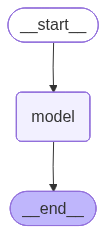

In [77]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.agents import create_agent

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")
agent1 = create_agent(model=llm, tools=[])
agent1

In [78]:
response4 = agent1.invoke({"messages":"Who are you?"})
response4

{'messages': [HumanMessage(content='Who are you?', additional_kwargs={}, response_metadata={}, id='13f6bb4e-0129-49aa-8350-b1f819f4927a'),
  AIMessage(content='I am a large language model, trained by Google.', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b8503-1e7c-77a2-b7fc-8d6971f9d221-0', usage_metadata={'input_tokens': 5, 'output_tokens': 11, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}})]}

## Streaming the response

In [68]:
from langchain.chat_models import init_chat_model

model = init_chat_model("google_genai:gemini-2.5-flash")
print(model)

profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True} google_api_key=SecretStr('**********') model='gemini-2.5-flash' client=<google.genai.client.Client object at 0x000001977CFA09D0> default_metadata=() model_kwargs={}


In [71]:
for chunk in model.stream("Write me a 50 words paragraph on Langchain"):
    print(chunk.text, end="")

LangChain is an open-source framework for building applications with large language models (LLMs). It provides components to chain LLMs with external data, tools, and custom logic. This simplifies creating context-aware systems like chatbots and autonomous agents, accelerating the development of powerful LLM-powered solutions by streamlining orchestration and interaction.

In [72]:
for chunk in model.stream("Write me a 50 words paragraph on Langchain"):
    print(chunk.text, end="|", flush=True)

LangChain is an open-source framework designed to build applications with large language models (LLMs). It simplifies connecting LLMs with external data sources, tools, and agents. This enables developers to create complex, context-aware LLM applications,| such as advanced chatbots, Q&A systems, and autonomous agents, by orchestrating various components efficiently.||